<a href="https://colab.research.google.com/github/manujsinghwal/applied-statistics-in-python/blob/main/2.%20data-vizualization/the_histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Histogram

A **histogram** is a type of bar chart that shows the distribution of numerical data. It represents data by grouping numbers into ranges (called **bins** or **classes**) and showing how many data points fall into each range.
* Each bar in a histogram represents a range (or class).
* The height of each bar shows how many data points (or occurrences) fall within that range.

\
**How to decide bins?**
\
**E.g.** Refer to the dataset below, the numbers of calls per day made from a cell phone for the past 30 days.
\
$[4, 5, 1, 0, 7, 8, 3, 6, 8, 3, 0, 9, 2, 12, 14, 5, 5, 10, 7, 2, 11, 9, 4, 3, 1, 5, 7, 3, 5, 6]$

\
One option is the $ 2^k >= n $ rule to determine the number of classes, where $k$ equals the number of classes and $n$ equals the number of data points.
\
\
Given $n = 30$, the best value for $k$ is 5. How?
\
$ 2^k >= n $
\
$ 2^k >= 30 $
\
$ 2^5 >= 30 $
\
$ 32 >= 30 $
\
\
Calculate the width $W$ of each class.
\
\
$ W = \frac{Largest\:value - Smallest\:value}{Number\:of\:classes}\ $
\
$ W = \frac{14 - 0}{5}\ $
\
$ W = 2.8 ≈	3 $

In [63]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
# Generating dataset
df = pd.DataFrame({
    'Class': ['[3-6)','[3-6)','[0-3)','[0-3)','[6-9)','[6-9)','[3-6)','[6-9)','[6-9)','[3-6)','[0-3)','[9-12)','[0-3)','[12-15)','[12-15)','[3-6)','[3-6)','[9-12)','[6-9)','[0-3)','[9-12)','[9-12)','[3-6)','[3-6)','[0-3)','[3-6)','[6-9)','[3-6)','[3-6)','[6-9)'],
    'CallsPerDay': [4,5,1,0,7,8,3,6,8,3,0,9,2,12,14,5,5,10,7,2,11,9,4,3,1,5,7,3,5,6],
    'DayType': ['Weekday','Weekday','Weekday','Weekday','Weekday','Weekend','Weekend','Weekday','Weekday','Weekday','Weekday','Weekday','Weekend','Weekend','Weekday','Weekday','Weekday','Weekday','Weekday','Weekend','Weekend','Weekday','Weekday','Weekday','Weekday','Weekday','Weekend','Weekend','Weekday','Weekday'],
    'Date':['2021-03-01','2021-03-02','2021-03-03','2021-03-04','2021-03-05','2021-03-06','2021-03-07','2021-03-08','2021-03-09','2021-03-10','2021-03-11','2021-03-12','2021-03-13','2021-03-14','2021-03-15','2021-03-16','2021-03-17','2021-03-18','2021-03-19','2021-03-20','2021-03-21','2021-03-22','2021-03-23','2021-03-24','2021-03-25','2021-03-26','2021-03-27','2021-03-28','2021-03-29','2021-03-30']
})

# Shows top 5 records only
df.head()

,Class,CallsPerDay,DayType,Date
0,[3-6),4,Weekday,2021-03-01
1,[3-6),5,Weekday,2021-03-02
2,[0-3),1,Weekday,2021-03-03
3,[0-3),0,Weekday,2021-03-04
4,[6-9),7,Weekday,2021-03-05


In [95]:
# Best number of classes based on the rule 2^k >= n (since 2^5 >= 30)
k = 5
min_value = df['CallsPerDay'].min()
max_value = df['CallsPerDay'].max()

# Classes width (rounded up to the next whole number)
w = np.ceil((max_value - min_value)/k).astype(int)
w

3

In [96]:
# Creating bins
bins = np.arange(min_value, max_value + w, w)
bins

array([ 0,  3,  6,  9, 12, 15])

In [97]:
# Setting up some customizations
plt.figure(figsize=(10, 6))  # Set the figure size
sns.set(style='whitegrid') # Setting the background theme

<Figure size 1000x600 with 0 Axes>

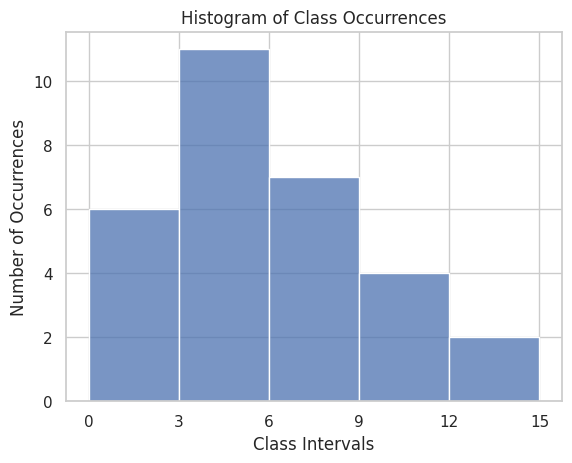

In [98]:
# Plotting histogram
sns.histplot(
    data=df,
    x='CallsPerDay',
    bins=bins
    )

# Setting up x-axis ticks to match the bin edges
plt.xticks(bins)

# Adding labels and title
plt.xlabel("Class Intervals")
plt.ylabel("Number of Occurrences")
plt.title("Histogram of Class Occurrences")
plt.show()

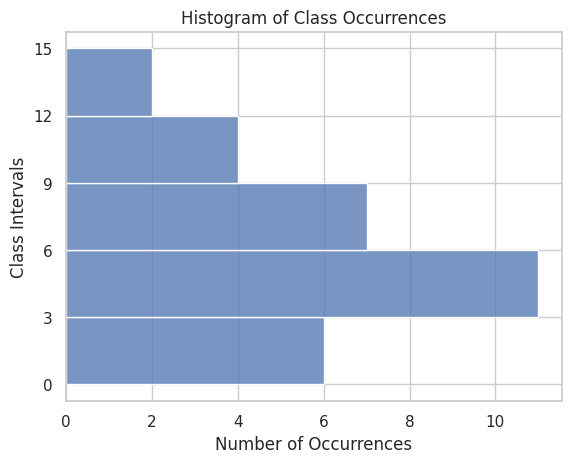

In [99]:
# Plotting histogram
# Flipping the plot by assigning the data variable to the y axis
sns.histplot(
    data=df,
    y='CallsPerDay',
    bins=bins
    )

# Setting up y-axis ticks to match the bin edges
plt.yticks(bins)

# Adding labels and title
plt.ylabel("Class Intervals")
plt.xlabel("Number of Occurrences")
plt.title("Histogram of Class Occurrences")
plt.show()

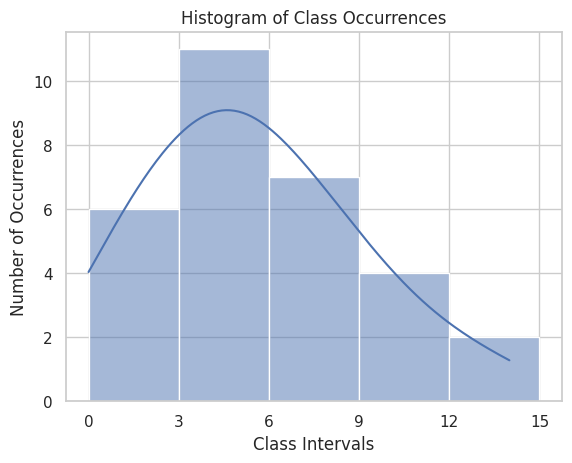

In [100]:
# Plotting histogram
# Adding a kernel density estimate to smooth the histogram, providing complementary information about the shape of the distribution
sns.histplot(
    data=df,
    x='CallsPerDay',
    bins=bins,
    kde=True
    )

# Setting up x-axis ticks to match the bin edges
plt.xticks(bins)

# Adding labels and title
plt.xlabel("Class Intervals")
plt.ylabel("Number of Occurrences")
plt.title("Histogram of Class Occurrences")
plt.show()

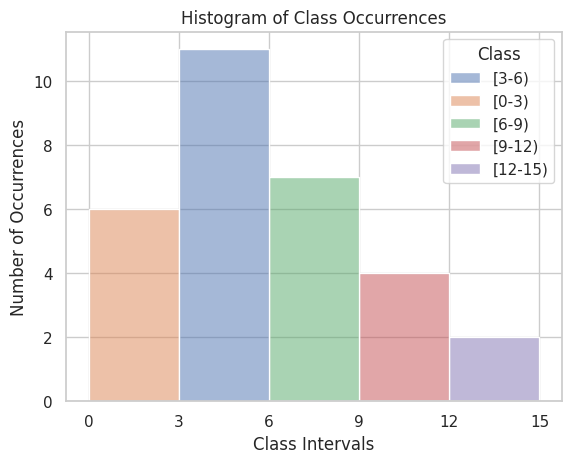

In [103]:
# Plotting histogram with hue mapping
sns.histplot(
    data=df,
    x='CallsPerDay',
    bins=bins,
    hue='Class'
    )

# Setting up x-axis ticks to match the bin edges
plt.xticks(bins)

# Adding labels and title
plt.xlabel("Class Intervals")
plt.ylabel("Number of Occurrences")
plt.title("Histogram of Class Occurrences")
plt.show()

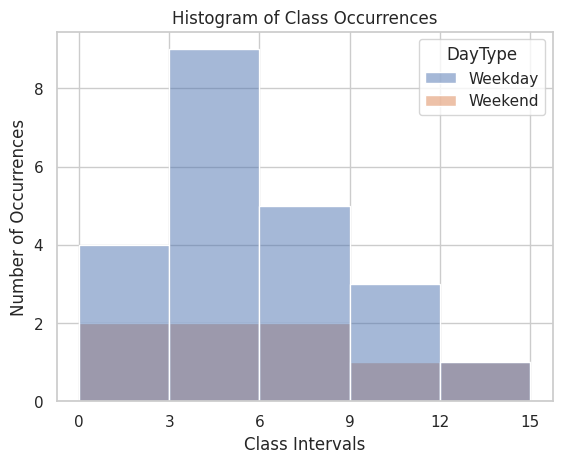

In [104]:
# Plotting histogram with hue mapping
# Multiple histogram based on the type of data
sns.histplot(
    data=df,
    x='CallsPerDay',
    bins=bins,
    hue='DayType'
    )

# Setting up x-axis ticks to match the bin edges
plt.xticks(bins)

# Adding labels and title
plt.xlabel("Class Intervals")
plt.ylabel("Number of Occurrences")
plt.title("Histogram of Class Occurrences")
plt.show()

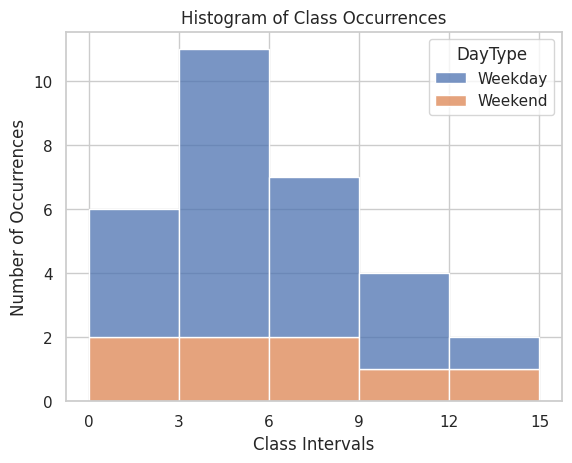

In [105]:
# Plotting histogram with hue mapping
# The default approach to plotting multiple distributions is to “layer” them, but we can also “stack” them:
sns.histplot(
    data=df,
    x='CallsPerDay',
    bins=bins,
    hue='DayType',
    multiple='stack'
    )

# Setting up x-axis ticks to match the bin edges
plt.xticks(bins)

# Adding labels and title
plt.xlabel("Class Intervals")
plt.ylabel("Number of Occurrences")
plt.title("Histogram of Class Occurrences")
plt.show()

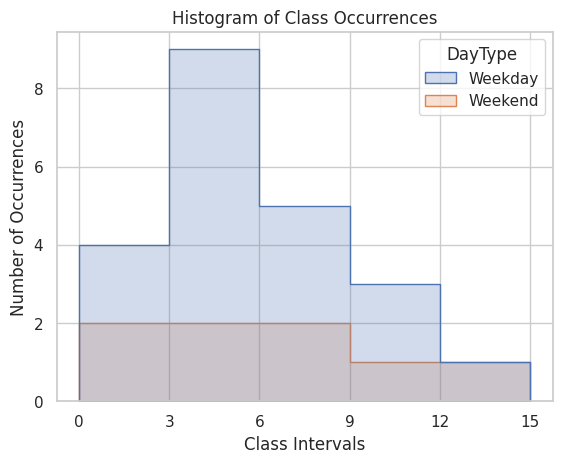

In [107]:
# Plotting histogram with hue mapping
# Overlapping bars can be hard to visually resolve. A different approach would be to draw a step function:
sns.histplot(
    data=df,
    x='CallsPerDay',
    bins=bins,
    hue='DayType',
    element='step'
    )

# Setting up x-axis ticks to match the bin edges
plt.xticks(bins)

# Adding labels and title
plt.xlabel("Class Intervals")
plt.ylabel("Number of Occurrences")
plt.title("Histogram of Class Occurrences")
plt.show()

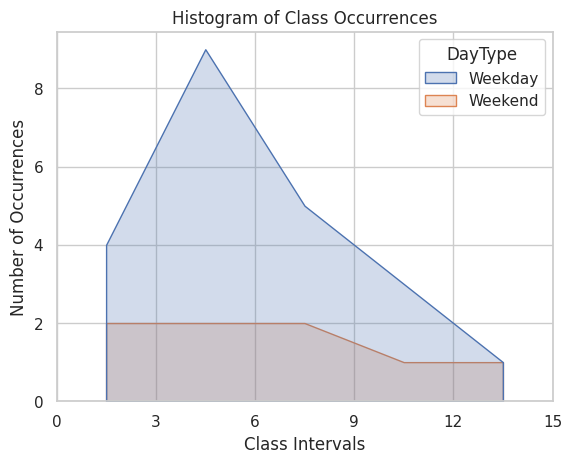

In [108]:
# Plotting histogram with hue mapping
# Overlapping bars can be hard to visually resolve. A different approach would be to draw a step function:
sns.histplot(
    data=df,
    x='CallsPerDay',
    bins=bins,
    hue='DayType',
    element='poly'
    )

# Setting up x-axis ticks to match the bin edges
plt.xticks(bins)

# Adding labels and title
plt.xlabel("Class Intervals")
plt.ylabel("Number of Occurrences")
plt.title("Histogram of Class Occurrences")
plt.show()

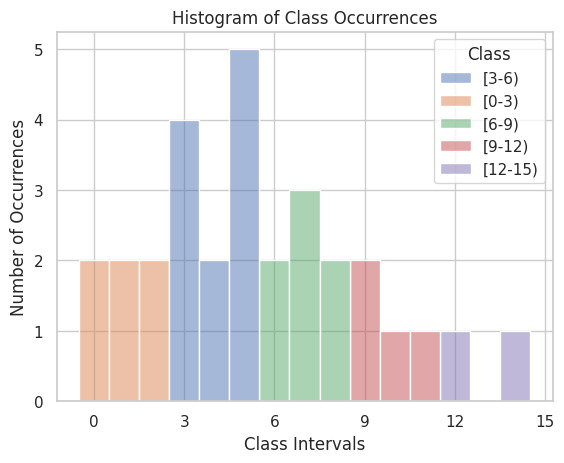

In [122]:
# Plotting histogram with hue mapping
sns.histplot(
    data=df,
    x='CallsPerDay',
    bins=bins,
    hue='Class',
    discrete=True
    )

# Setting up x-axis ticks to match the bin edges
plt.xticks(bins)

# Adding labels and title
plt.xlabel("Class Intervals")
plt.ylabel("Number of Occurrences")
plt.title("Histogram of Class Occurrences")
plt.show()

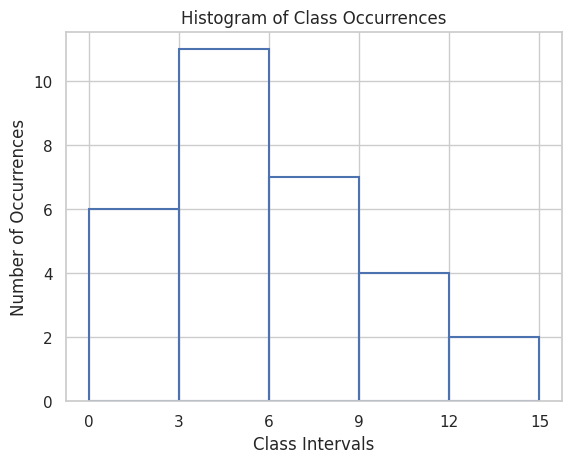

In [126]:
# Plotting histogram with hue mapping
sns.histplot(
    data=df,
    x='CallsPerDay',
    bins=bins,
    fill=False
    )

# Setting up x-axis ticks to match the bin edges
plt.xticks(bins)

# Adding labels and title
plt.xlabel("Class Intervals")
plt.ylabel("Number of Occurrences")
plt.title("Histogram of Class Occurrences")
plt.show()

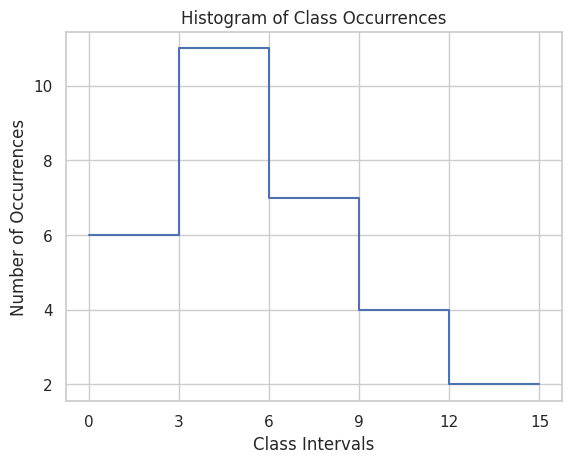

In [127]:
# Plotting histogram with hue mapping
sns.histplot(
    data=df,
    x='CallsPerDay',
    bins=bins,
    element='step',
    fill=False
    )

# Setting up x-axis ticks to match the bin edges
plt.xticks(bins)

# Adding labels and title
plt.xlabel("Class Intervals")
plt.ylabel("Number of Occurrences")
plt.title("Histogram of Class Occurrences")
plt.show()